In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
db_conn = psycopg2.connect(user="root", password='password', host="covid.cm5sr8tqgvlt.us-east-2.rds.amazonaws.com", port="5432", database="postgres")


In [42]:
results = pd.read_sql_query("SELECT * FROM country_cases WHERE country LIKE 'United States%' AND province != 'CTRY' AND confirmed > 0", db_conn)
results = results.sort_values(by='record_date')


In [31]:
results.sort_values('record_date').tail()

,recovered,deaths,country,confirmed,active_cases,record_date,province
4499,0,487,United States of America,13885,13398,2020-05-21,Wisconsin
4500,0,2,United States of America,22,20,2020-05-21,Northern Mariana Islands
4501,0,199,United States of America,3935,3748,2020-05-21,New Hampshire
4488,0,1460,United States of America,53053,51593,2020-05-21,Texas
4532,298418,94702,United States of America,1577147,1184027,2020-05-21,CTRY


In [5]:
ohio_data = results[results.province == 'Ohio'].copy()
ohio_data.sort_values(by=['record_date'], inplace=True)
ohio_data.reset_index(drop=True, inplace=True)

In [6]:
ohio_data.head()

,recovered,deaths,country,confirmed,active_cases,record_date,province
0,0,0,United States of America,3,3,2020-03-10,Ohio
1,0,0,United States of America,4,4,2020-03-11,Ohio
2,0,0,United States of America,5,5,2020-03-12,Ohio
3,0,0,United States of America,12,12,2020-03-13,Ohio
4,0,0,United States of America,26,26,2020-03-14,Ohio


In [7]:
ohio_data['ROC'] = ohio_data['confirmed'].pct_change()

In [8]:
# Start with a Rate of Change of 0 for the first day there was a confirmed case
ohio_data['ROC'].fillna(0, inplace=True)

In [9]:
ohio_data['ROC'].head()

0    0.000000
1    0.333333
2    0.250000
3    1.400000
4    1.166667
Name: ROC, dtype: float64

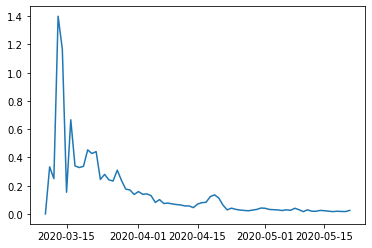

In [10]:
plt.plot(ohio_data['record_date'], ohio_data['ROC'])

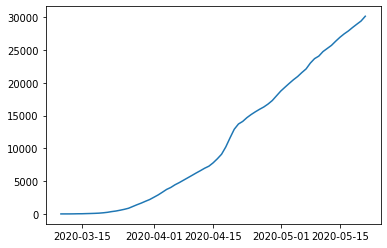

In [11]:
plt.plot(ohio_data['record_date'], ohio_data['confirmed'])

In [12]:
brazil = pd.read_sql_query("SELECT * FROM country_cases WHERE country = 'Brazil' AND confirmed > 0", db_conn)

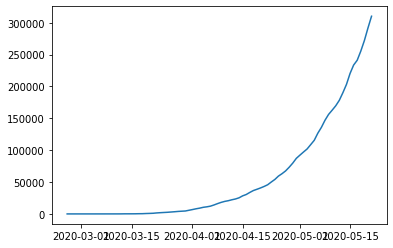

In [13]:
plt.plot(brazil['record_date'], brazil['confirmed'])

In [14]:
brazil['ROC'] = brazil['confirmed'].pct_change()
brazil['ROC'].fillna(0, inplace=True)

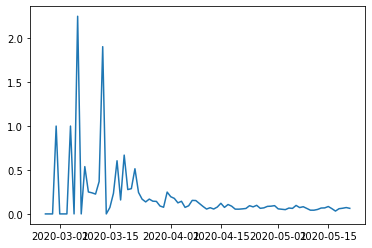

In [15]:
plt.plot(brazil['record_date'], brazil['ROC'])

In [61]:
start_date = pd.to_datetime('2020-05-20')
end_date = pd.to_datetime('2020-05-21')
mask = (results['record_date'] >= start_date) & (results['record_date'] <= end_date)
curr_data = results[mask]
curr_data.head()

,recovered,deaths,country,confirmed,active_cases,record_date,province
4336,0,6066,United States of America,88970,82904,2020-05-20,Massachusetts
4339,0,2123,United States of America,42323,40274,2020-05-20,Maryland
4338,0,10749,United States of America,150776,140027,2020-05-20,New Jersey
4337,0,407,United States of America,7551,7144,2020-05-20,District of Columbia
4335,0,77,United States of America,2506,2429,2020-05-20,Idaho


In [66]:
curr_data['province'].unique()
mask = ~curr_data['province'].isin(['Grand Princess', 'Diamond Princess', 'Guam', 
                                   'Puerto Rico', 'Northern Mariana Islands', 'Virgin Islands'])
curr_data = curr_data[mask]

In [80]:
grouped_data = curr_data.groupby('province')
curr_data['ROC'] = grouped_data['confirmed'].pct_change()

In [112]:
curr_data = curr_data.dropna()
curr_data.sort_values('ROC', ascending=False, inplace=True)
states = curr_data.iloc[:10]['province']

In [113]:
curr_data[['province', 'confirmed', 'ROC']].head(10)

,province,confirmed,ROC
4356,Arkansas,5458,0.090945
4365,North Dakota,2229,0.063962
4359,Virginia,34137,0.037347
4376,Iowa,16170,0.035211
4379,Wisconsin,13885,0.035190
4387,Louisiana,36504,0.033639
4398,Maine,1877,0.031886
4394,District of Columbia,7788,0.031387
4373,Minnesota,18200,0.029994
4374,Tennessee,18961,0.029818


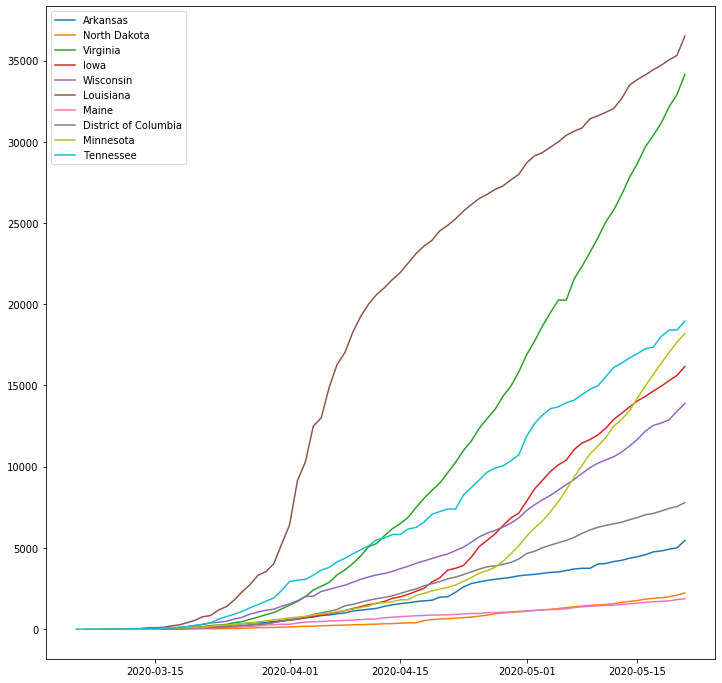

In [115]:
fig= plt.figure(figsize=(12,12))
for state in states:
    state_data = results[results['province'] == state]
    plt.plot(state_data['record_date'], state_data['confirmed'])
    
plt.legend(labels=states)